# Import the Library

In [1]:
import numpy as np

# Normalizing  MNIST the Data Set 

In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


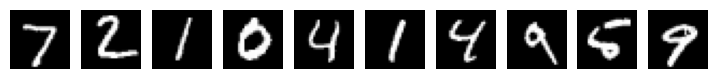

In [3]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

# Autoencoder Model

In [4]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 16)                1616      
                                                                 
 dense_4 (Dense)             (None, 100)               1700      
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

# Training of the Autoencoder model.

In [5]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 24s 44ms/step - loss: 0.1889 - val_loss: 0.1347
Epoch 2/10
469/469 [==============================] - 17s 36ms/step - loss: 0.1258 - val_loss: 0.1179
Epoch 3/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1144 - val_loss: 0.1101
Epoch 4/10
469/469 [==============================] - 17s 37ms/step - loss: 0.1093 - val_loss: 0.1080
Epoch 5/10
469/469 [==============================] - 16s 35ms/step - loss: 0.1061 - val_loss: 0.1042
Epoch 6/10
469/469 [==============================] - 16s 35ms/step - loss: 0.1039 - val_loss: 0.1031
Epoch 7/10
469/469 [==============================] - 16s 35ms/step - loss: 0.1022 - val_loss: 0.1021
Epoch 8/10
469/469 [==============================] - 18s 38ms/step - loss: 0.1009 - val_loss: 0.1007
Epoch 9/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0997 - val_loss: 0.0997
Epoch 10/10
469/469 [==============================] - 18s 39ms/step - loss: 0.098

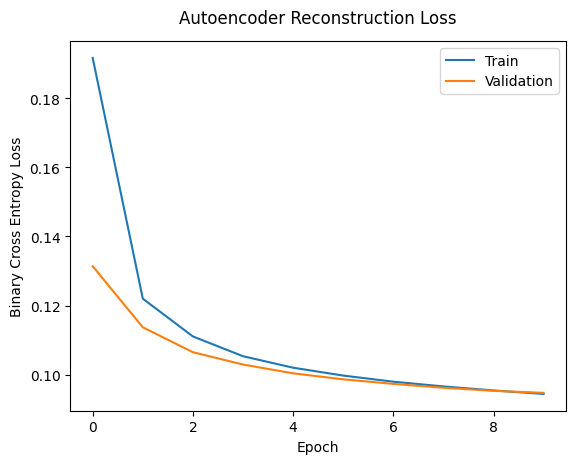

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

# Testing the recontsructing images by the autoencoder model

313/313 [==============================] - 3s 9ms/step


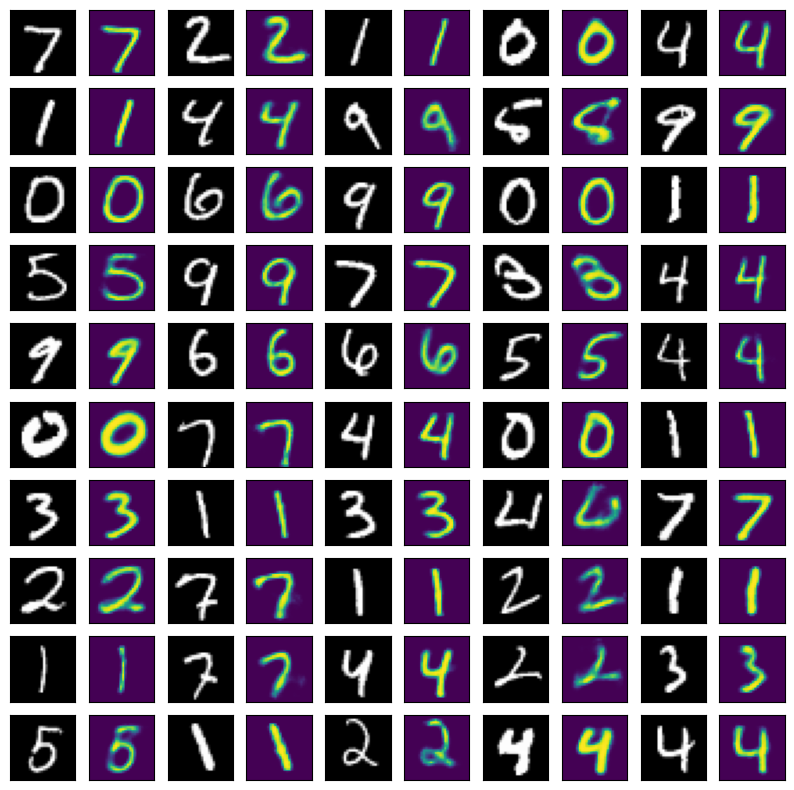

In [6]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 [==============================] - 0s 22ms/step
(1, 784)


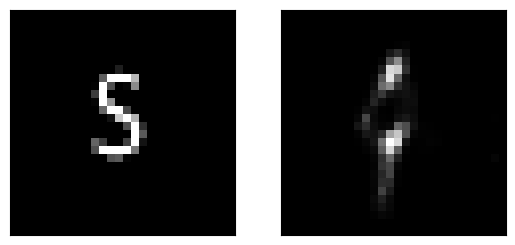

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/s1.PNG', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


In [9]:
autoencoder.save('/content/drive/MyDrive/initially_trained_autoencoder.h5')

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  MNIST DataSet reshaping and normalizing

In [24]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


# Loading, Normalizing, Reshaping, and Storing Images as Numpy Array

> Indented block



In [25]:
# Define target image size and color mode
from tensorflow.keras.preprocessing import image
target_size = (28, 28)
color_mode = "grayscale"
new_data = []
# Load 5 new images and display their predictions
for i in range(1, 6):
    # Load image
    img_path = f"/content/drive/MyDrive/s{i}.PNG"
    img = image.load_img(img_path, target_size=target_size, color_mode=color_mode)

    # Convert image to array and normalize
    input_arr = image.img_to_array(img) / 255
    input_arr = input_arr.reshape(784)
    input_arr = np.array([input_arr])
    new_data.append(input_arr.reshape(784))

In [26]:

new_data = np.array(new_data)

# Duplicate new images to match size of MNIST dataset
new_data = np.repeat(new_data, 200, axis=0)


In [27]:
new_data.shape

(1000, 784)

# Adding these into MNIST data set 

In [28]:
train_images = np.vstack((train_images, new_data))

In [29]:
test_images=np.vstack((test_images,new_data))

In [30]:
# Get random indices for shuffling
random_indices = np.random.permutation(len(train_images))

# Shuffle training and test data
train_images = train_images[random_indices]

# Get random indices for shuffling
random_indices = np.random.permutation(len(test_images))

# Shuffle training and test data
test_images = test_images[random_indices]

In [31]:
train_images.shape
test_images.shape

(11000, 784)

# Training with the new dataset 

In [32]:
from tensorflow import keras
latestmodel = keras.models.load_model('/content/drive/MyDrive/initially_trained_autoencoder.h5')

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = latestmodel.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images,test_images),
    callbacks=[early_stop]
)

Epoch 1/15
477/477 [==============================] - 21s 42ms/step - loss: 0.0972 - val_loss: 0.0927
Epoch 2/15
477/477 [==============================] - 18s 38ms/step - loss: 0.0962 - val_loss: 0.0921
Epoch 3/15
477/477 [==============================] - 17s 36ms/step - loss: 0.0955 - val_loss: 0.0918
Epoch 4/15
477/477 [==============================] - 17s 36ms/step - loss: 0.0949 - val_loss: 0.0911
Epoch 5/15
477/477 [==============================] - 17s 36ms/step - loss: 0.0944 - val_loss: 0.0907
Epoch 6/15
477/477 [==============================] - 17s 36ms/step - loss: 0.0939 - val_loss: 0.0905
Epoch 7/15
477/477 [==============================] - 18s 38ms/step - loss: 0.0935 - val_loss: 0.0904
Epoch 8/15
477/477 [==============================] - 18s 38ms/step - loss: 0.0930 - val_loss: 0.0898
Epoch 9/15
477/477 [==============================] - 17s 36ms/step - loss: 0.0927 - val_loss: 0.0906
Epoch 10/15
477/477 [==============================] - 17s 36ms/step - loss: 0.092

# Data Reconstruction by using the concatenated data set

344/344 [==============================] - 3s 7ms/step


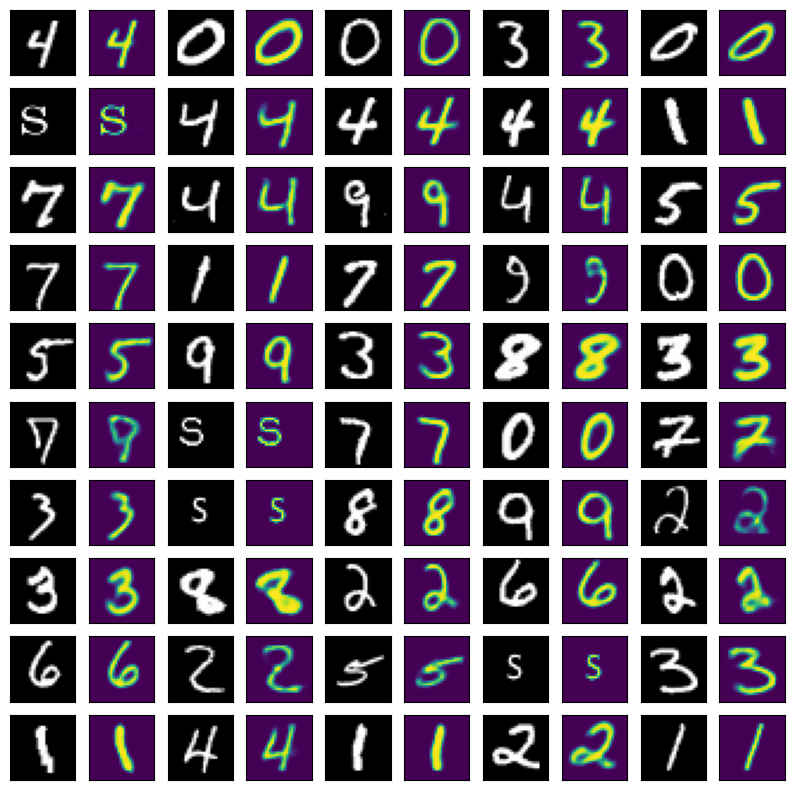

In [33]:
reconstructed_images = latestmodel.predict(test_images)

images = []
for i in range(1000):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

# Testing with image 1

1/1 [==============================] - 0s 35ms/step
(1, 784)


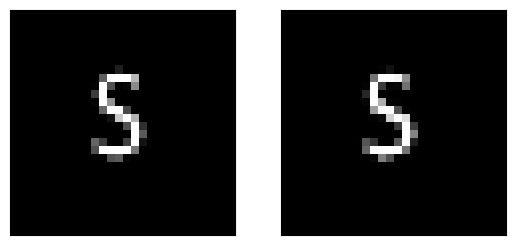

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/s1.PNG', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = latestmodel.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# With Image 2

1/1 [==============================] - 0s 23ms/step
(1, 784)


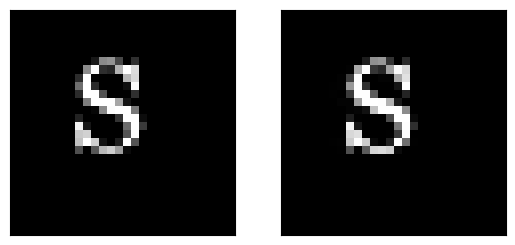

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/s2.PNG', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = latestmodel.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# With image 3

1/1 [==============================] - 0s 39ms/step
(1, 784)


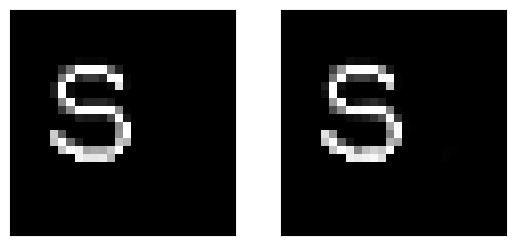

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/s3.PNG', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = latestmodel.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# With image 4

1/1 [==============================] - 0s 22ms/step
(1, 784)


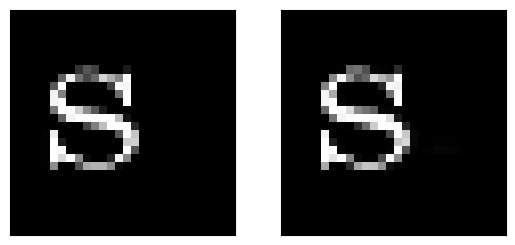

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/s4.PNG', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = latestmodel.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# With image 5

1/1 [==============================] - 0s 22ms/step
(1, 784)


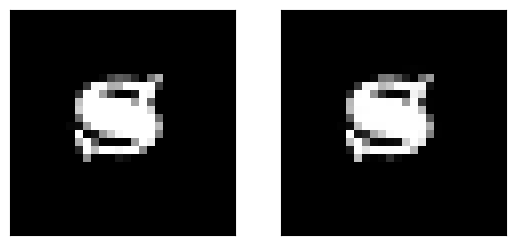

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/s5.PNG', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = latestmodel.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Incorporating both my digits set and the new images

344/344 [==============================] - 2s 6ms/step


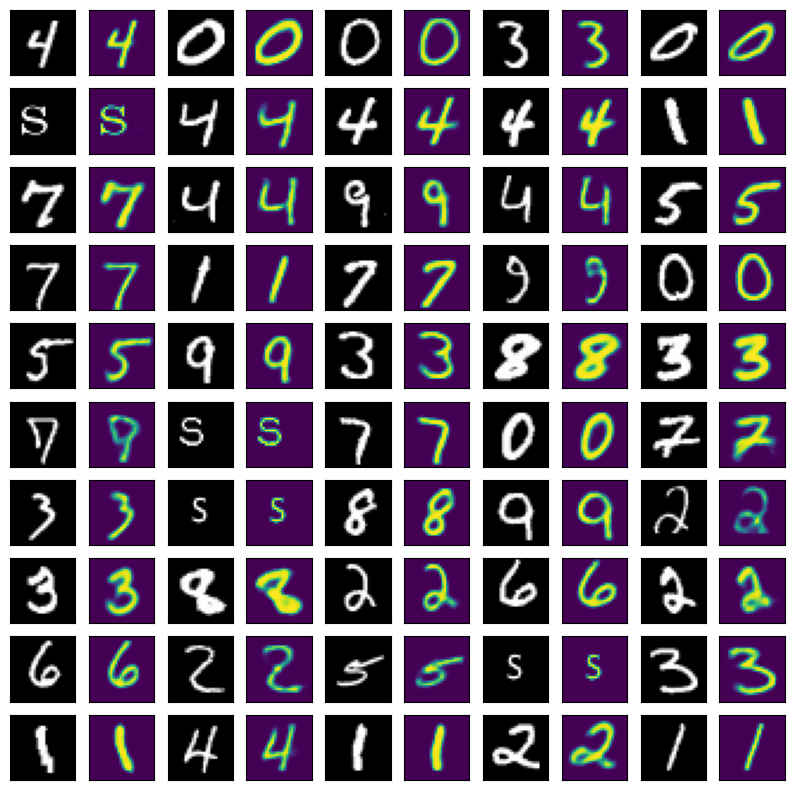

In [40]:
reconstructed_images = latestmodel.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

# Saving the best model

In [41]:
latestmodel.save('/content/drive/MyDrive/output_model.h5')

# Inference
Created an autoencoder model and trained with both MNIST dataset and new images. The initial model was trained only with the MNIST dataset and performed well on testing. The new model trained with the concatenated dataset including the shuffled new images performed well and was saved as latestmodel.